In [3]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

# Expectation and Variance

Although a random variable is completely described by its probability mass function (PMF), we often use **expectation** and **variance** to describe the variable's long-run average and spread. These two values have unique mathematical properties that hold particular importance for data science—for example, we can show that an estimation is accurate in the long term by showing that its expected value is equal to the population parameter. We proceed by defining expectation and variance, introducing their most useful mathematical properties, and conclude with a brief application to estimation.

## Expectation

We are often interested in the long-run average of a random variable because it gives us a sense of the center of the variable's distribution. We call this long-run average the **expected value**, or the **expectation** of a random variable. The expected value of a random variable $ X $ is:

$$\mathbb{E}[X] = \sum_{x\in \mathbb{X}} x \cdot P(X = x)$$

For example, if $ X $ represents the roll of a single fair six-sided die, 

$$
\begin{aligned}
\mathbb{E}[X]
&= 1 \cdot P(X = 1) + 2 \cdot P(X = 2) + \ldots + 6 \cdot P(X = 6) \\
&= 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + \ldots + 6 \cdot \frac{1}{6} \\
&= 3.5
\end{aligned}
$$

Notice that the expected value of $ X $ does not have to be a possible value of $ X $. Although $ \mathbb{E}[X] = 3.5 $, $ X $ cannot actually take on the value $ 3.5 $.

**Example:** Recall our dataset from the previous section:

In [4]:
data={"Name":["Carol","Bob","John","Dave"], 'Age': [50,52,51,50]}
people = pd.DataFrame(data)
people

,Name,Age
0,Carol,50
1,Bob,52
2,John,51
3,Dave,50


We pick one person from this dataset uniformly at random. Let $ Y $ be a random variable representing the age of this person. Then:

$$
\begin{aligned}
\mathbb{E}[Y]
&= 50 \cdot P(Y = 50) + 51 \cdot P(Y = 51) + 52 \cdot P(Y = 52) \\
&= 50 \cdot \frac{2}{4} + 51 \cdot \frac{1}{4} + 52 \cdot \frac{1}{4} \\
&= 50.75
\end{aligned}
$$

**Example:** Suppose we sample two people from the dataset with replacement. If the random variable $ Z $ represents the difference between the ages of the first and second persons in the sample, what is  $ \mathbb{E}[Z] $?


As in the previous section, we define $X$ as the age of the first person and $Y$ as the age of the second such that $Z = X - Y$. From the joint distribution of $X$ and $Y$ given in the previous section, we can find the PMF for $ Z $. For example, $ P(Z = 1) = P(X = 51, Y = 50) + P(X = 52, Y = 51) = \frac{3}{16} $. Thus,

$$
\begin{aligned}
\mathbb{E}[Z]
&= (-2) \cdot P(Z = -2) + (-1) \cdot P(Z = -1) + \ldots + (2) \cdot P(Z = 2) \\
&= (-2) \cdot \frac{2}{16} + (-1) \cdot \frac{3}{16}+ \ldots + (2) \cdot \frac{2}{16} \\
&= 0
\end{aligned}
$$

Since $ \mathbb{E}[Z] = 0 $, we expect that in the long run the difference between the ages of the people in a sample of size 2 will be 0.

### Linearity of Expectation

When working with linear combinations of random variables as we did above, we can often make good use of the **linearity of expectation** instead of tediously calculating each joint probability individually.

The linearity of expectation states that:

$$
\begin{aligned}
\mathbb{E}[X + Y] &= \mathbb{E}[X] + \mathbb{E}[Y] \\
\end{aligned}
$$

From this statement we may also derive:

$$
\begin{aligned}
\mathbb{E}[cX] &= c\mathbb{E}[X] \\
\end{aligned}
$$

where $X$ and $Y$ are random variables, and $c$ is a constant.

In words, the expectation of a sum of any two random variables is equal to the sum of the expectations of the variables.

In the previous example, we saw that $ Z = X - Y $. Thus,  $ \mathbb{E}[Z] = \mathbb{E}[X - Y] = \mathbb{E}[X] - \mathbb{E}[Y] $. 

Now we can calculate $ \mathbb{E}[X] $ and  $ \mathbb{E}[Y] $ separately from each other. Since $ \mathbb{E}[X] = \mathbb{E}[Y] = 50.75 $, $ \mathbb{E}[Z] = 50.75 - 50.75 = 0 $.

The linearity of expectation holds even if $ X $ and $ Y $ are dependent on each other! As an example, let us again consider the case in which we sample two people from our small dataset in the previous section without replacement. As before, we define $X$ as the age of the first person and $Y$ as the age of the second, and $Z = X - Y$. Clearly, $X$ and $Y$ are not independent—knowing $ X = 52 $, for example, means that $ Y \neq 52 $.

From the joint distribution of $X$ and $Y$ given in the previous section, we can find $\mathbb{E}[Z]$:

$$
\begin{aligned}
\mathbb{E}[Z]
&= (-2) \cdot P(Z = -2) + (-1) \cdot P(Z = -1) + \ldots + (2) \cdot P(Z = 2) \\
&= (-2) \cdot \frac{2}{12} + (-1) \cdot \frac{3}{12}+ \ldots + (2) \cdot \frac{2}{12} \\
&= 0
\end{aligned}
$$

A simpler way to compute this expectation is to use the linearity of expectation. Even though $X$ and $Y$ dependent, $\mathbb{E}[Z] = \mathbb{E}[X - Y] = \mathbb{E}[X] - \mathbb{E}[Y]$. Recall from the previous section that $X$ and $Y$ have the same PMF even though we are sampling without replacement, which means that $\mathbb{E}[X] = \mathbb{E}[Y] = 50.75$. Hence as in the first scenario, $\mathbb{E}[Z] = 0$.

Note that the linearity of expectation only holds for linear combinations of random variables. For example, $ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] $ is not a linear combination of $ X $ and $ Y $. In this case, $ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] $ is true in general only for independent random variables.

## Variance

The variance of a random variable is a numerical description of the variable's spread. For a random variable $ X $:

$$
\begin{aligned}
Var(X) &= \mathbb{E}[(X - \mathbb{E}[X])^2] \\
\end{aligned}
$$

The above formula states that the variance of $ X $ is the average squared distance from $ X $'s expected value.

With some algebraic manipulation that we omit for brevity, we may also equivalently write:

$$
\begin{aligned}
Var(X) &= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
\end{aligned}
$$

Consider the following two random variables $ X $ and $ Y $ with the following probability distributions:

In [23]:
def plot_pmf(xs, probs, rv_name='X', val_name='x', prob_denom=4):
    plt.plot(xs, probs, 'ro', ms=12, mec='b', color='b')
    plt.vlines(xs, 0, probs, colors='b', lw=4)
    plt.xlabel(f'${val_name}$')
    plt.ylabel(f'$P({rv_name} = {val_name})$')
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0, 1, prob_denom + 1),
               ['0']
               + [rf'$\frac{{{n}}}{{{prob_denom}}}$'
                  for n in range(1, prob_denom)]
               + ['1'])
    plt.title(f'PMF of ${rv_name}$');

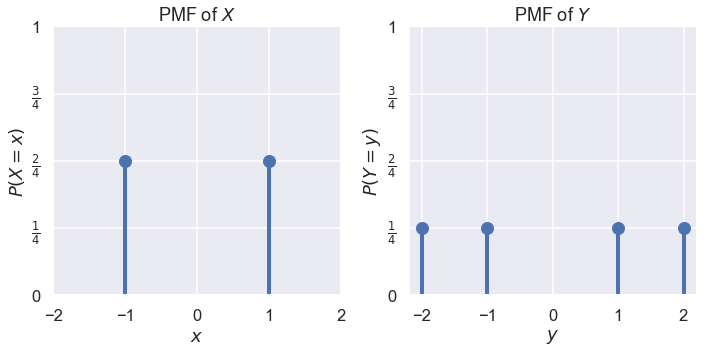

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_pmf([-1, 1], [0.5, 0.5])
plt.xlim(-2, 2);

plt.subplot(1, 2, 2)
plot_pmf((-2, -1, 1, 2), (1/4, 1/4, 1/4, 1/4), rv_name='Y', val_name='y')
plt.tight_layout()

$ X $ takes on values -1 and 1 with probability $ \frac{1}{2} $ each. $ Y $ takes on values -2, -1, 1, and 2 with probability $ \frac{1}{4} $ each. We find that $ \mathbb{E}[X] = \mathbb{E}[Y] = 0 $. Since $ Y $'s distribution has a higher spread than $ X $'s, we expect that $ Var(Y) $ is larger than $ Var(X) $.

$$
\begin{aligned}
Var(X)
&= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
&= \mathbb{E}[X^2] - 0^2 \\
&= \mathbb{E}[X^2] \\
&= (-1)^2 P(X = -1) + (1)^2 P(X = 1) \\
&= 1 \cdot 0.5 + 1 \cdot 0.5 \\
&= 1 \\\\
Var(Y)
&= \mathbb{E}[Y^2] - \mathbb{E}[Y]^2 \\
&= \mathbb{E}[Y^2] - 0^2 \\
&= \mathbb{E}[Y^2] \\
&= (-2)^2 P(Y = -2) + (-1)^2 P(Y = -1) + (1)^2 P(Y = 1) + (2)^2 P(Y = 2) \\
&= 4 \cdot 0.25 + 1 \cdot 0.25 + 1 \cdot 0.25 + 4 \cdot 0.25\\
&= 2.5
\end{aligned}
$$

As expected, the variance of $ Y $ is greater than the variance of $ X $.

The variance has a useful property to simplify some calculations. If $ X $ is a random variable:

$$
\begin{aligned}
Var(aX + b) &= a^2 Var(X)
\end{aligned}
$$

If two random variables $ X $ and $ Y $ are independent:

$$
\begin{aligned}
Var(X + Y) = Var(X) + Var(Y)
\end{aligned}
$$

Note that the linearity of expectation holds for any $ X $ and $ Y $ even if they are dependent. However, $ Var(X + Y) = Var(X) + Var(Y) $ holds only when $ X $ and $ Y $ are **independent**.

### Covariance

The covariance of two random variables $X$ and $Y$ is defined as:

$$
\begin{aligned}
Cov(X, Y) &= \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
\end{aligned}
$$

Again, we can perform some algebraic manipulation to obtain:

$$
\begin{aligned}
Cov(X, Y) = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]
\end{aligned}
$$

Note that although the variance of a single random variable must be non-negative, the covariance of two random variables can be negative. In fact, the covariance helps measure the correlation between two random variables; the sign of the covariance helps us determine whether two random variables are positively or negatively correlated. If two random variables $X$ and $Y$ are independent, then $Cov(X, Y) = 0$, and $\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y]$.

## Bernoulli Random Variables

Suppose we want to use a random variable $X$ to a simulate a biased coin with $P(Heads) = p$. We can say that $X = 1$ if the coin flip is heads, and $X = 0$ if the coin flip is tails. Therefore, $P(X = 1) = p$, and $P(X = 0) = 1 - p$. This type of binary random variable is called a Bernoulli random variable; we can calculate its expected value and variance as follows:

$$\mathbb{E}[X] = 1 \times p + 0 \times (1 - p) = p$$

$$
\begin{aligned}
Var(X) &= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
&= 1^2 \times p + 0^2 \times (1 - p) - p^2 \\
&= p - p^2 \\
&= p(1 - p)
\end{aligned}
$$

## Sample Means

Suppose we possess a biased coin with $P(Heads) = p$ and we would like to estimate $ p $. We can flip the coin $ n $ times to collect a sample of flips and calculate the proportion of heads in our sample, $ \hat p $. If we know that $ \hat p $ is often close to $ p $, we can use $ \hat p $ as an **estimator** for $ p $.

Notice that $ p $ is *not* a random quantity; it is a fixed value based on the bias of the coin. $ \hat p $, however, is a random quantity since it is generated from the random outcomes of flipping the coin. Thus, we can compute the expectation and variance of $ \hat p $ to precisely understand how well it estimates $ p $.

To compute $ \mathbb{E}[\hat p] $, we will first define random variables for each flip in the sample. Let $X_i$ be a Bernoulli random variable for the $i^{th}$ coin flip. Then, we know that:

$$
\begin{aligned}
\hat p = \frac{X_1 + X_2 + \ldots + X_n}{n}
\end{aligned}
$$

To calculate the expectation of $ \hat p $, we can plug in the formula above and use the fact that $ \mathbb{E}[X_i] = p $ since $ X_i $ is a Bernoulli random variable.

$$
\begin{aligned}
\mathbb{E}[\hat p] 
&= \mathbb{E} \left[ \frac{X_1 + X_2 + \ldots + X_n}{n} \right] \\
&= \frac{1}{n} \mathbb{E}[X_1 + \ldots + X_n] \\
&= \frac{1}{n} \left( \mathbb{E}[X_1] +  \ldots + \mathbb{E}[X_n] \right) \\
&= \frac{1}{n} (p + \ldots + p) \\
&= \frac{1}{n} (np) \\
\mathbb{E}[\hat p] &= p
\end{aligned}
$$

We find that $ \mathbb{E}[\hat p] = p $. In other words, with enough flips we expect our estimator $ \hat p $ to converge to the true coin bias $ p $. We say that $ \hat p $ is an **unbiased estimator** of $ p $.

Next, we calculate the variance of $ \hat p $. Since each flip is independent from the others, we know that $ X_i $ are independent. This allows us to use the linearity of variance.

$$
\begin{aligned}
Var(\hat p) &= Var \left(\frac{1}{n} \sum_{i=1}^{n} X_i \right) \\
&= \frac{1}{n^2} \sum_{i=1}^{n}Var(X_i) \\
&= \frac{1}{n^2} \times np(1-p) \\
Var(\hat p) &= \frac{p(1-p)}{n}
\end{aligned}
$$

From the equivalence above, we see that the variance of our estimator decreases as we increase $ n $, the number of flips in our sample. In other words, if we collect lots of data we can be more certain about our estimator's value. This behavior is known as the law of large numbers.

## Summary

We use expectation and variance to provide simple descriptions of a random variable's center and spread. These mathematical tools allow us to determine how well an quantity calculated from a sample estimates a quantity in the population.

Minimizing a loss function creates a model that is accurate on its training data. Expectation and variance allow us to make general statements about the model's accuracy on unseen data from the population.